# TALLER NRO 2 ANALISIS UNIVARIADO
## CONJUNTO DE DATOS: datasetEmcali.csv

### PREGUNTA SMART

> ¿De qué manera podemos desarrollar un modelo predictivo basado en datos históricos recolectados cada hora de consumo energético, temperatura y fecha de medicion, para estimar con un margen de error menor al 10% la demanda de energía en Cali para los siguientes 7 dias, permitiendo una mejor planificación y distribución del suministro?

>> Específica: Se centra en la predicción de la demanda energética en Cali semanal.
>> Medible: Se establece un margen de error menor al 5%.
>> Alcanzable: Usa datos históricos y variables relevantes.
>> Relevante: Facilita la planificación y distribución del suministro permite cumplir con las normas de regulatorias de distribucion de energia.
>> Temporal: El pronóstico es a 7 dias

### Diccionario de datos:

- FECHA: Fecha en formato ISO de la lectura del consumo
- TEMPERATURA: Temperatura en grados Centigrados al momento de la toma del dato
- DIA DE LA SEMANA: Numero de dia de la semana  0 Domingo, 1 Lunes, 2 Martes, 3 Miercoles, 4 Jueves, 5 Viernes, 6 Sabado
- HORA: Hora en formato numerico
- TIPO DE DIA: Clasificacion del dia ordinario (de lunes a viernes), Sabado, domingo
- CONSUMO: Variable objetvio medido en MVA



In [3]:
#importamos las librerias para analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset desde un archivo .xlsx
df = pd.read_excel('Data/datasetEmcali_Imputacion.xlsx')
print(df.head())
#mostramos la informacion del dataset
print(df.info())

                FECHA  TEMPERATURA  CONSUMO  DIA DE LA SEMANA  HORA  \
0 2017-12-01 00:00:00         27.9    409.0                 5     0   
1 2017-12-01 01:00:00         29.0    387.0                 5     1   
2 2017-12-01 02:00:00         29.1    378.0                 5     2   
3 2017-12-01 03:00:00         28.2    370.0                 5     3   
4 2017-12-01 04:00:00         26.7    364.0                 5     4   

  TIPO DE DIA  
0   ordinario  
1   ordinario  
2   ordinario  
3   ordinario  
4   ordinario  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29520 entries, 0 to 29519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             29520 non-null  datetime64[ns]
 1   TEMPERATURA       29520 non-null  float64       
 2   CONSUMO           29520 non-null  float64       
 3   DIA DE LA SEMANA  29520 non-null  int64         
 4   HORA              29520 non-null  int64 

## COLUMNA SELECCIONADA: TEMPERATURA

> HIPOTESIS: La temperatura es una variable clave en el análisis del consumo de energía, ya que influye directamente en el uso por parte de los usarios de equipos electronicos para mejorar el confort termico (Aires acondicionados, Ventiladores, entre otros) en la ciudad cali. Influye en la toma de decisiones porque entre mas temperatura mayor consumo de energia

>

> La temperatura es relevante en el análisis del consumo energético en Cali, ya que afecta directamente la demanda de electricidad, especialmente por el uso de equipos electronicos para el confort termico. En el análisis, permite identificar patrones estacionales y predecir picos de consumo, facilitando la toma de decisiones para optimizar la distribución de energía en la ciudad de Cali.





# PUNTO 2: Análisis univariado en Python

### LIMPIEZA DE DATOS

In [5]:
#revisamos si hay datos duplicados
print(df.duplicated().sum())
#mostramos los datos duplicados y el cruce de filas duplicadas

0


In [7]:
#se describe el Dataset
print(df.describe())

                     FECHA   TEMPERATURA       CONSUMO  DIA DE LA SEMANA  \
count                29520  29520.000000  29520.000000      29520.000000   
mean   2019-08-07 23:30:00     24.160133    455.574139          4.000813   
min    2017-12-01 00:00:00     16.100000    227.000000          1.000000   
25%    2018-10-04 11:45:00     21.800000    372.000000          2.000000   
50%    2019-08-07 23:30:00     23.600000    447.000000          4.000000   
75%    2020-06-10 11:15:00     26.400000    541.000000          6.000000   
max    2021-04-13 23:00:00     34.000000    676.000000          7.000000   
std                    NaN      3.185012     95.616579          2.001456   

               HORA  
count  29520.000000  
mean      11.500000  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000  
std        6.922304  


In [8]:
#mostramos la cantidad de valores nulos
print(df.isnull().sum())

FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO DE DIA         0
dtype: int64


In [11]:

#mostramos la cantidad de valores nulos
print("Valores Nulos")
print(df.isnull().sum())

Valores Nulos
FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO DE DIA         0
dtype: int64


In [12]:


#inputamos los valores nulos de temperatura con la temeraura de la fila anterior, ya que la temperatura no varia mucho en un corto periodo de tiempo
df['TEMPERATURA']= df['TEMPERATURA'].ffill()
print(df.isnull().sum())
#eliminamos los valores nulos
df.dropna(inplace=True)
#mostramos la cantidad de valores nulos despues de eliminarlos
print(df.isnull().sum())

FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO DE DIA         0
dtype: int64
FECHA               0
TEMPERATURA         0
CONSUMO             0
DIA DE LA SEMANA    0
HORA                0
TIPO DE DIA         0
dtype: int64


In [13]:
print(df.describe())

                     FECHA   TEMPERATURA       CONSUMO  DIA DE LA SEMANA  \
count                29520  29520.000000  29520.000000      29520.000000   
mean   2019-08-07 23:30:00     24.160133    455.574139          4.000813   
min    2017-12-01 00:00:00     16.100000    227.000000          1.000000   
25%    2018-10-04 11:45:00     21.800000    372.000000          2.000000   
50%    2019-08-07 23:30:00     23.600000    447.000000          4.000000   
75%    2020-06-10 11:15:00     26.400000    541.000000          6.000000   
max    2021-04-13 23:00:00     34.000000    676.000000          7.000000   
std                    NaN      3.185012     95.616579          2.001456   

               HORA  
count  29520.000000  
mean      11.500000  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000  
std        6.922304  


In [14]:
#analisis univariado de la variable 'TEMPERATURA'
#Calculamos la media, mediana, moda, desviación estándar, valores atípicos, valores nulos y valores únicos
media = df['TEMPERATURA'].mean()
mediana = df['TEMPERATURA'].median()
moda = df['TEMPERATURA'].mode()
desviacion = df['TEMPERATURA'].std()
valores_atipicos = df['TEMPERATURA'].isnull().sum()
valores_nulos = df['TEMPERATURA'].isnull().sum()
#Imprimimos los resultados
print('Media:', media)
print('Mediana:', mediana)
print('Moda:', moda)
print('Desviación estándar:', desviacion)
print('Valores atípicos:', valores_atipicos)
print('Valores nulos:', valores_nulos)
if desviacion > (0.5 * media):
    print("La desviación estándar es alta, lo que indica una alta dispersión de los datos alrededor de la media.")
else:
    print("La desviación estándar es baja, lo que indica una baja dispersión de los datos alrededor de la media.")


Media: 24.16013262195122
Mediana: 23.6
Moda: 0    23.6
Name: TEMPERATURA, dtype: float64
Desviación estándar: 3.185011947319734
Valores atípicos: 0
Valores nulos: 0
La desviación estándar es baja, lo que indica una baja dispersión de los datos alrededor de la media.


### VISUALIZAMOS

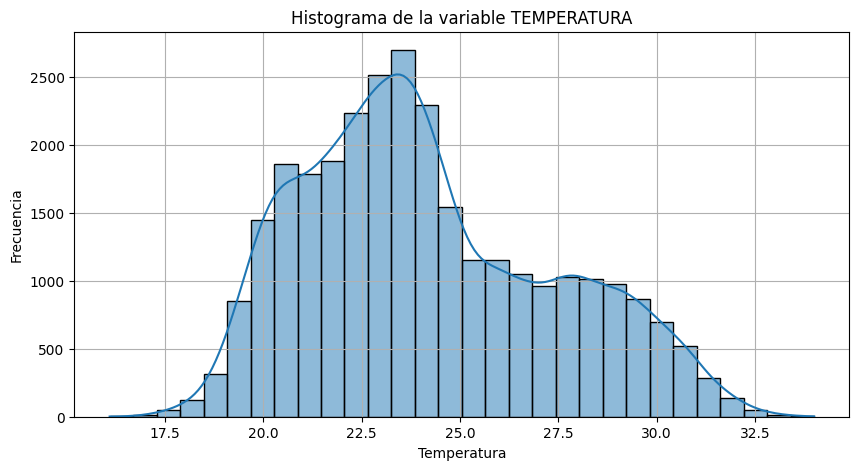

In [15]:
#Grafica de la variable 'TEMPERATURA' histograma, boxplot, violinplot
# Histograma con KDE
plt.figure(figsize=(10,5))
sns.histplot(df['TEMPERATURA'], bins=30, kde=True)
plt.title('Histograma de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

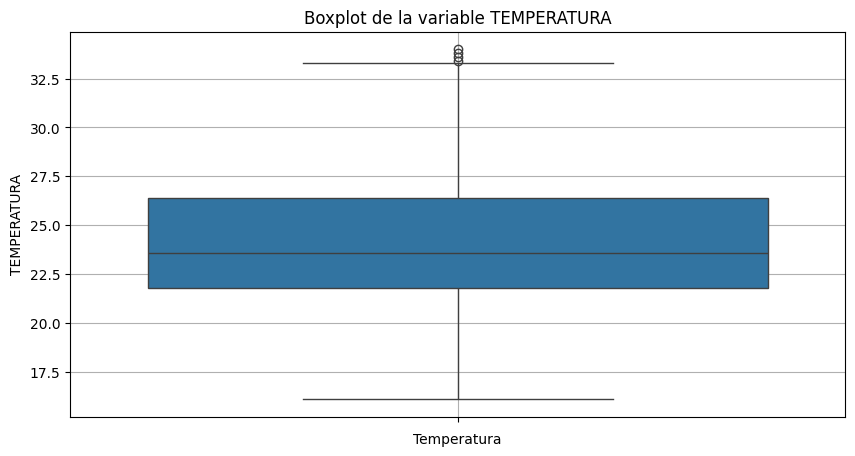

In [17]:
# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df['TEMPERATURA'])
plt.title('Boxplot de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.grid(True)
plt.show()

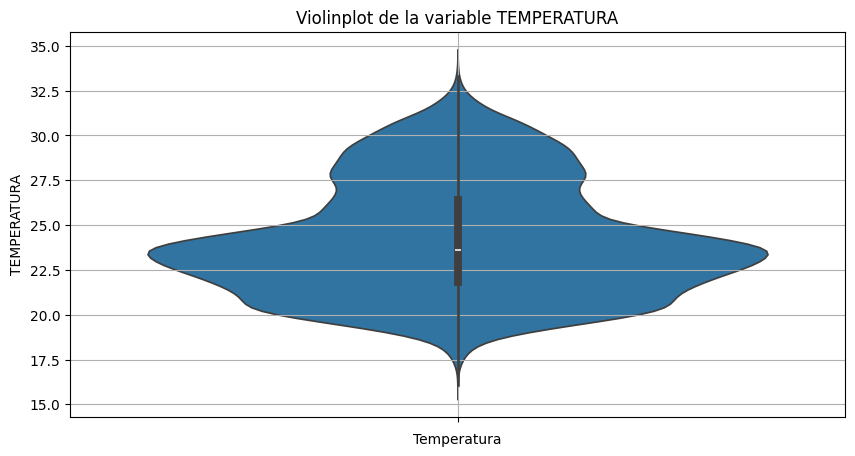

In [18]:




# Violinplot
plt.figure(figsize=(10,5))
sns.violinplot(df['TEMPERATURA'])
plt.title('Violinplot de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.grid(True)
plt.show()





### SESGOS O PATRONES

In [19]:
# Descriptive Statistics
print("Estadísticas Descriptivas de la variable TEMPERATURA:")
print(df['TEMPERATURA'].describe())

Estadísticas Descriptivas de la variable TEMPERATURA:
count    29520.000000
mean        24.160133
std          3.185012
min         16.100000
25%         21.800000
50%         23.600000
75%         26.400000
max         34.000000
Name: TEMPERATURA, dtype: float64


In [20]:


# Outliers Detection using IQR
Q1 = df['TEMPERATURA'].quantile(0.25)
Q3 = df['TEMPERATURA'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TEMPERATURA'] < (Q1 - 1.5 * IQR)) | (df['TEMPERATURA'] > (Q3 + 1.5 * IQR))]
print(f"Valores atípicos detectados:\n{outliers}")





Valores atípicos detectados:
                    FECHA  TEMPERATURA  CONSUMO  DIA DE LA SEMANA  HORA  \
6015  2018-08-08 15:00:00         33.8    651.0                 3    15   
15207 2019-08-26 15:00:00         34.0    662.0                 1    15   
15229 2019-08-27 13:00:00         33.6    649.0                 2    13   
15517 2019-09-08 13:00:00         33.4    476.0                 7    13   

      TIPO DE DIA  
6015    ordinario  
15207   ordinario  
15229   ordinario  
15517     domingo  


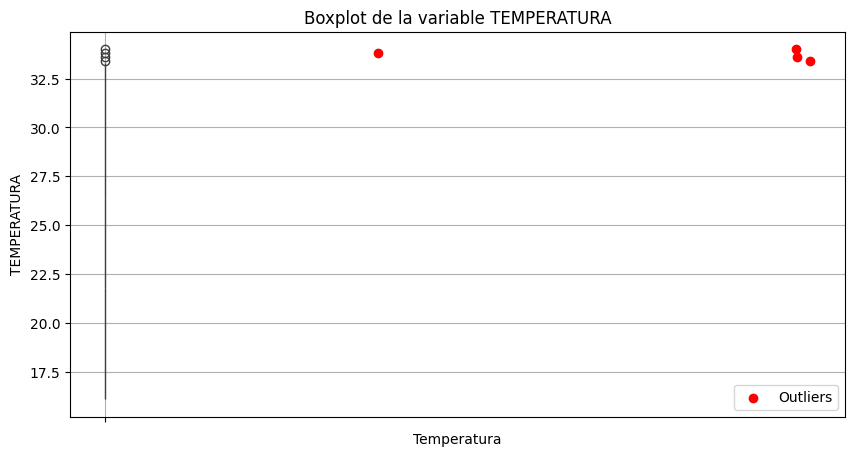

In [21]:
#graficamos los valores atipicos
plt.figure(figsize=(10,5))
sns.boxplot(df['TEMPERATURA'])
plt.scatter(outliers.index, outliers['TEMPERATURA'], color='r', label='Outliers')
plt.title('Boxplot de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.grid(True)
plt.legend()
plt.show()

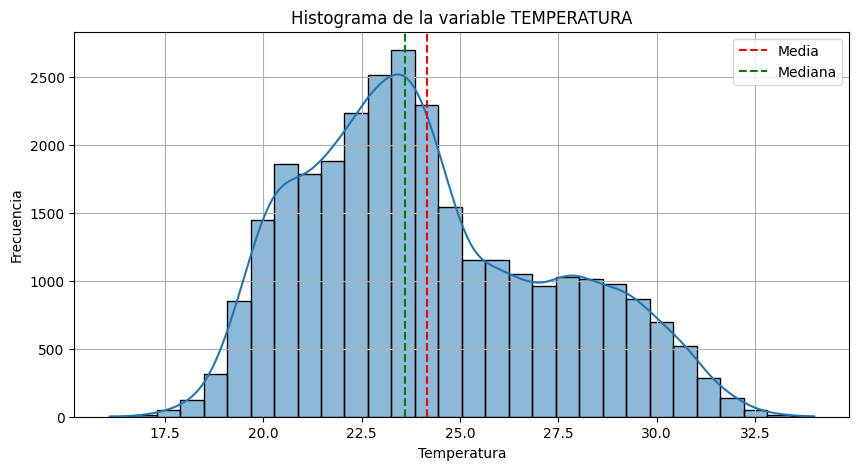

In [22]:


#graficamos posibles sesgos
plt.figure(figsize=(10,5))
sns.histplot(df['TEMPERATURA'], bins=30, kde=True)
plt.title('Histograma de la variable TEMPERATURA')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.axvline(df['TEMPERATURA'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df['TEMPERATURA'].median(), color='g', linestyle='--', label='Mediana')
plt.grid(True)
plt.legend()
plt.show()


### CONCLUSIONES DEL ANALISIS

- la Media, Mediana y Moda: son similares, lo anterior  indica que la distribución es significativamente simétrica, con lo cual se puede inferir que no existen sesgos en la muestra.
- La desviación estándar es baja, lo que significa que existe una baja dispersión en los datos alrededor de la media.
- En el gráfico de bloxplot se evidencia claramente que la mayor parte de los datos de TEMPERATURA se encuentran entre 22°C y 27°C con posibles valores atípicos por encima de los 33°C
- El histograma de la variable TEMPERATURA muestra una distribución que tiene un grado de asimétrica considerablemente alto a la derecha, lo que significa que hay más valores concentrados en temperaturas más bajas, pero con una cola extendida hacia valores más altos. La media (línea roja) es ligeramente mayor que la mediana (línea verde), lo que indica que la distribución tiene valores atípicos o extremos en la parte alta de la temperatura. La mayor frecuencia de temperaturas se encuentra alrededor de los 22°C
- En el Histograma se puede visualizar que la mayoría de las temperaturas en Cali están entre 22°C y 25°C, con una distribución ligeramente sesgada a la derecha, pero no relevante. La media es mayor que la mediana, lo que indica la presencia de valores atípicos en temperaturas altas.
- La línea de mayor ajuste pasa por todo el gráfico casi sin alejarse del mismo lo cuál muestra una tendencia muy fuerte y positiva en los datos de la muestra en cuestión.

- Conclusion: En resumen, los datos de temperatura en Cali muestran una distribución mayormente simétrica con baja dispersión, aunque hay algunos valores atípicos en temperaturas más altas. La tendencia general es positiva y fuerte.
